# Gráficos  - Projeto 3 - QTA

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

### Obtendo dados


In [79]:
relatorio_qualidade_2005_2010 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2005-2010.xlsx", engine='openpyxl')
relatorio_qualidade_2010_2015 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2010-2015.xlsx", engine='openpyxl')
relatorio_qualidade_2015_2020 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2015-2020.xlsx", engine='openpyxl')
relatorio_qualidade_2020_2021 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2020-2021.xlsx", engine='openpyxl')
all_dfs = [relatorio_qualidade_2005_2010, relatorio_qualidade_2010_2015, relatorio_qualidade_2015_2020, relatorio_qualidade_2020_2021]
historico = pd.concat(all_dfs)

In [80]:
def get_data_from_parameter(parameter, multiple_parameters = False):
    if not multiple_parameters:
        df = historico[historico["Parametro"] == parameter][["Data Coleta", "Valor"]]
    else:
        df = historico[historico["Parametro"].isin(parameter)][["Parametro", "Data Coleta", "Valor"]]
    
    df['Valor'] = [x.replace(',', '.') for x in df['Valor']]
    df['Valor'] = pd.to_numeric(df.Valor)
    df.sort_values(by='Data Coleta')
    
    return df


ph = get_data_from_parameter("pH")
temp_agua = get_data_from_parameter("Temperatura da Água")
temp_ar = get_data_from_parameter("Temperatura do Ar")
coliformes = get_data_from_parameter("Escherichia coli**")
solidos_suspensos = get_data_from_parameter("Sólido Suspenso Total")
turbidez = get_data_from_parameter("Turbidez")

nitrogenio = get_data_from_parameter(["Nitrogênio Kjeldahl", "Nitrogênio-Nitrito", "Nitrogênio-Nitrato"], multiple_parameters=True)
nitrogenio = nitrogenio.groupby(['Data Coleta']).sum().reset_index()

ox_dissolvido = get_data_from_parameter("Oxigênio Dissolvido")
dbo = get_data_from_parameter("DBO (5, 20)")

variaveis = {'ph':ph,'temperatura da água':temp_agua, 'temperatura do ar':temp_ar, 'coliformes':coliformes, 'solidos suspensos':solidos_suspensos, 'turbidez':turbidez, 'nitrogenio':nitrogenio, 'oxigenio dissolvido':ox_dissolvido, 'dbo':dbo}

### Plotando gráficos 

In [81]:
def plot_data(data_x, data_y, title, y_label):
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.scatter(data_x, data_y)
    plt.scatter(data_x[-1], data_y[-1], color='red')
    plt.gcf().autofmt_xdate()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel("Data Coleta")
    plt.grid(True)
    plt.show()

def filtra_out(dados):
    return dados[dados['Data Coleta'].str.contains('/09/|/10/|/11/')]

### Dados Coletados 

In [82]:
coleta_data = '21/10/2021' 
coleta_ph = 6
coleta_dbo = 6.6
coleta_ox_dissolvido = 0
coleta_temp_agua = 20.5
coleta_temp_ar = 22.7
coleta_nitrogenio = 0.7
coleta_turbidez = 32.22
coleta_solidos_suspensos = 5180
coleta_coliformes = 0

In [83]:
coleta_variaveis = {'ph':coleta_ph,
                    'temperatura da água':coleta_temp_agua, 
                    'temperatura do ar':coleta_temp_ar, 
                    'coliformes':coleta_coliformes, 
                    'solidos suspensos':coleta_solidos_suspensos, 
                    'turbidez':coleta_turbidez, 
                    'nitrogenio':coleta_nitrogenio, 
                    'oxigenio dissolvido':coleta_ox_dissolvido, 
                    'dbo':coleta_dbo}

In [84]:
variaveis['dbo'].columns

Index(['Data Coleta', 'Valor'], dtype='object')

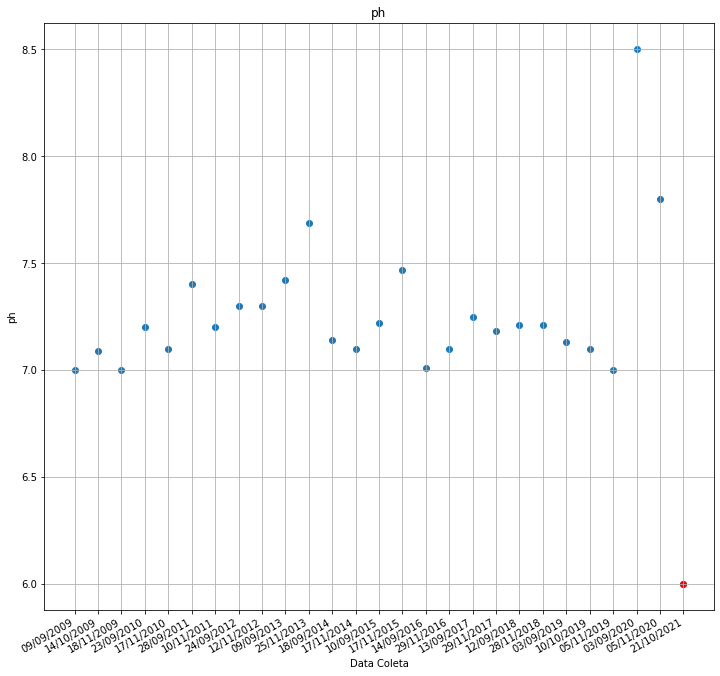

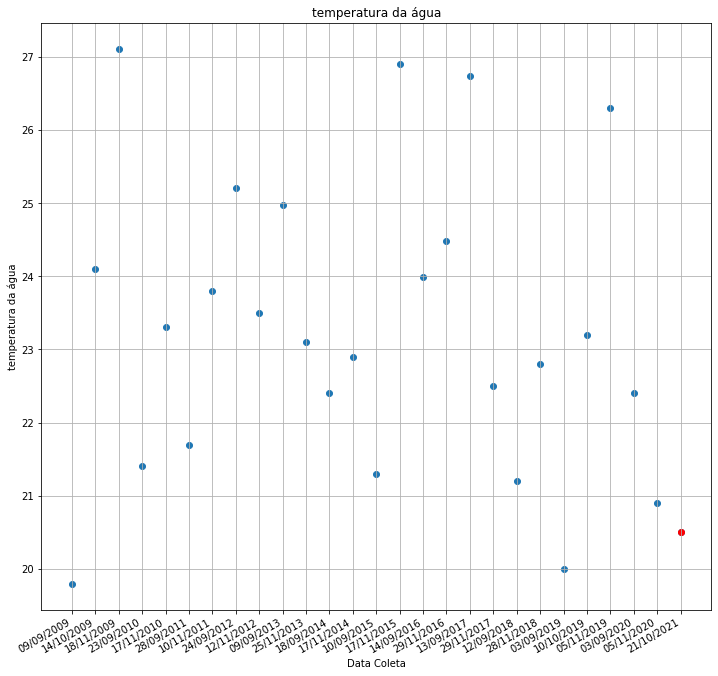

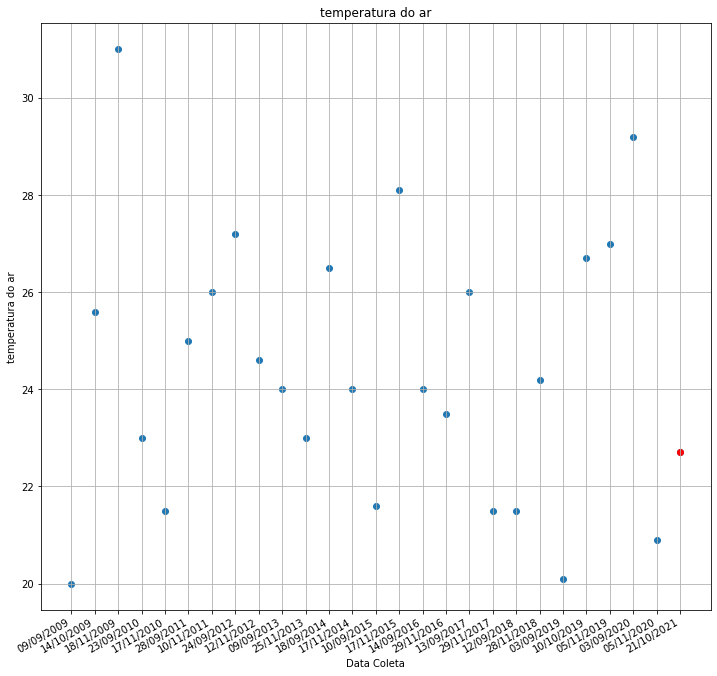

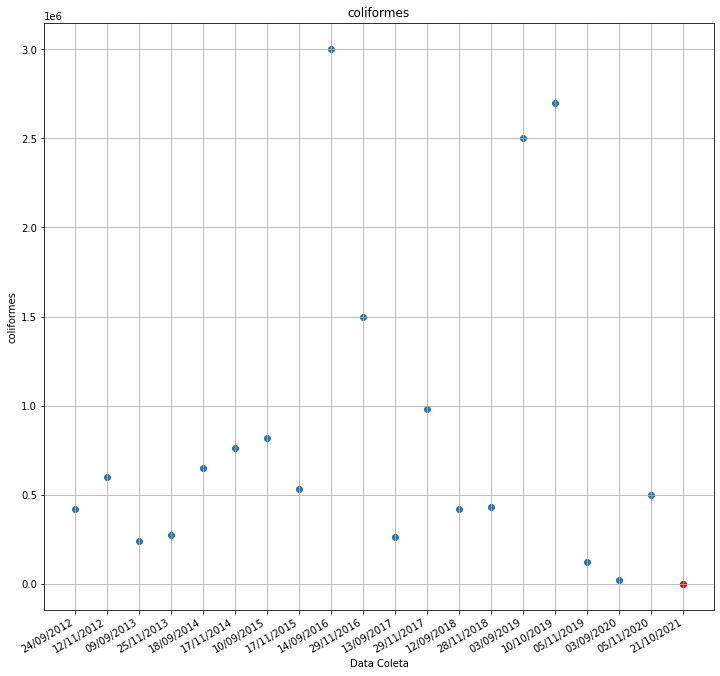

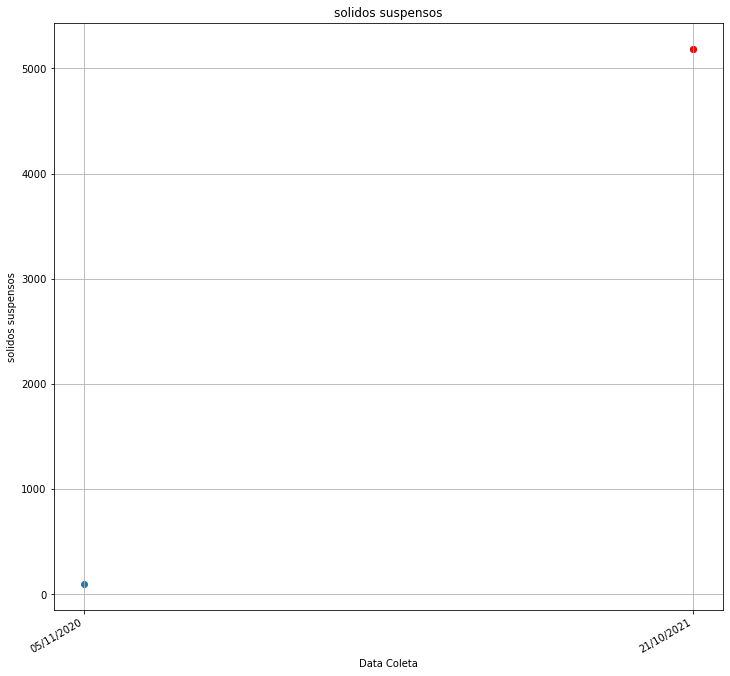

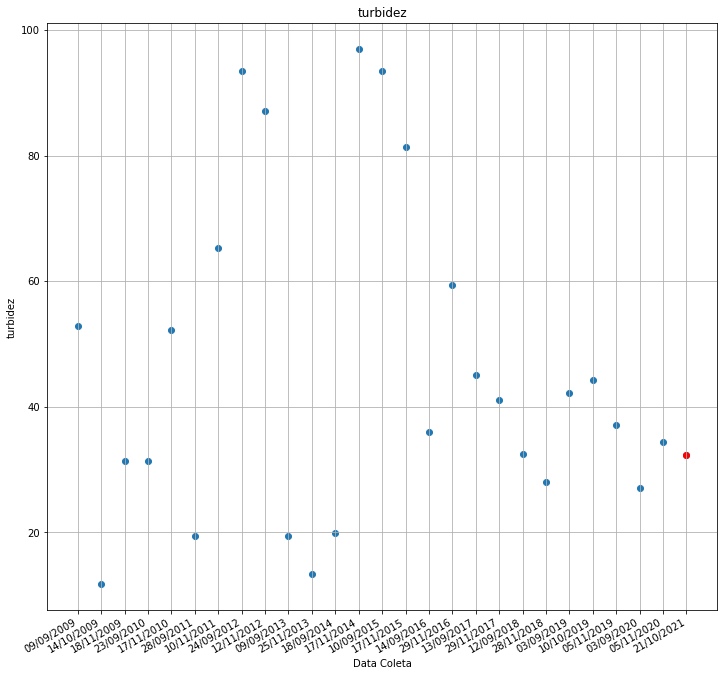

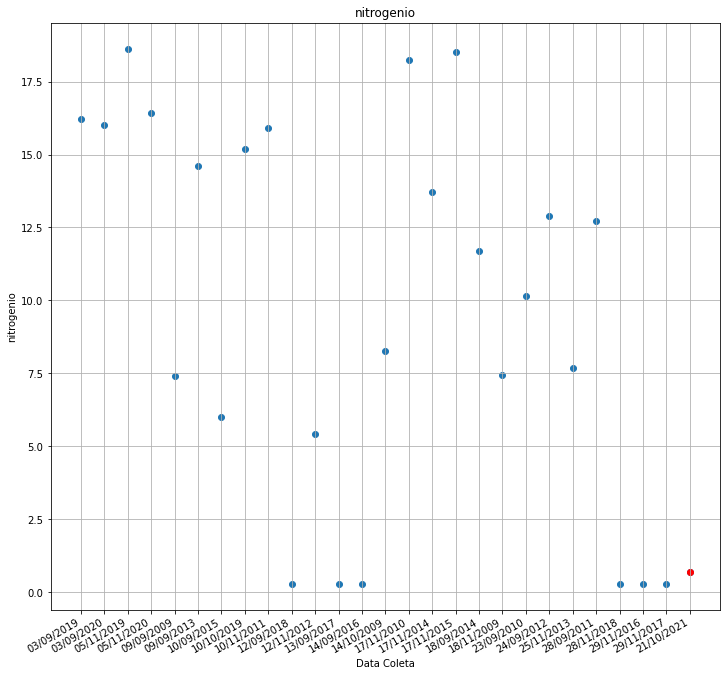

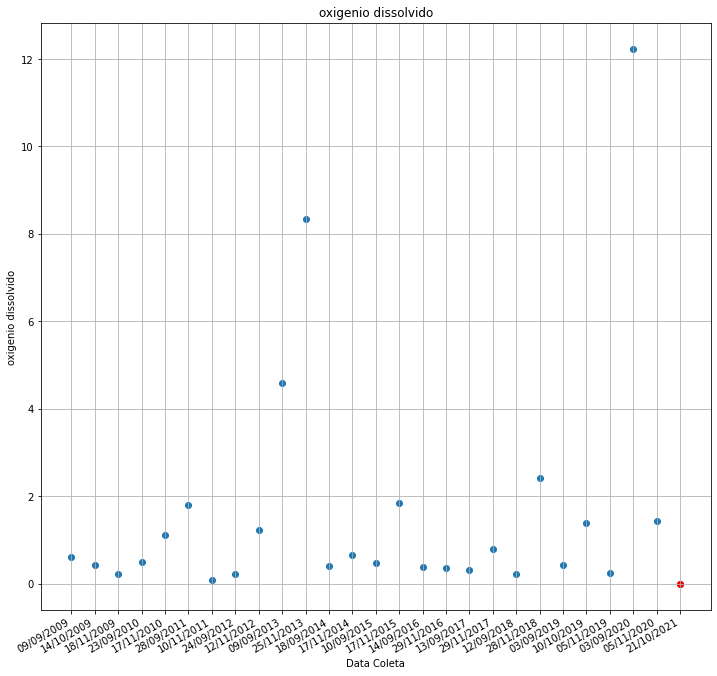

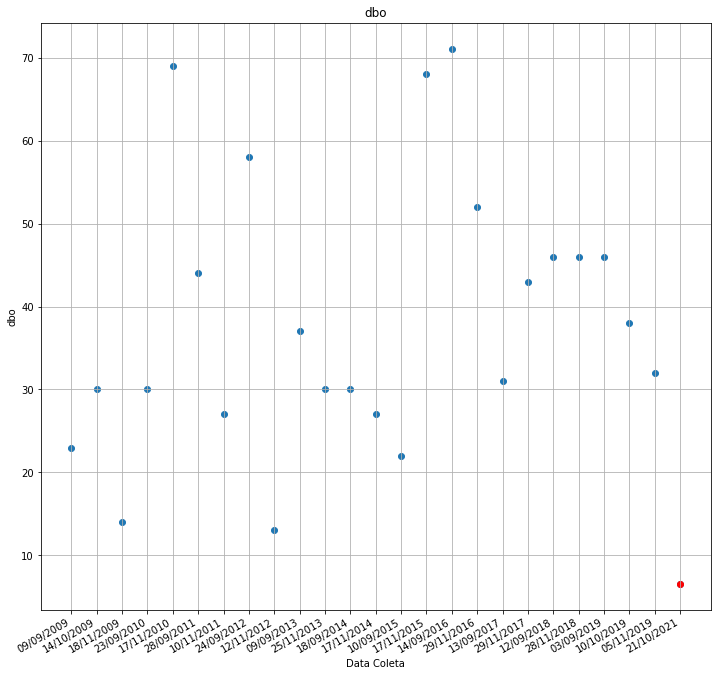

In [85]:
for k,v in variaveis.items():
    v.loc[-1] = [coleta_data, coleta_variaveis[k]] 
    variaveis[k] = filtra_out(v)
    plot_data(variaveis[k]['Data Coleta'], variaveis[k]['Valor'], k, k)
    